Tamaño del Efecto
===

https://www.youtube.com/watch?v=VR52vSbHBAk

In [6]:
from __future__ import print_function, division

import numpy
import scipy.stats

import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# seed the random number generator so we all get the same results
numpy.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

## Parte 1

Para explorar estadísticas que cuantifiquen el tamaño del efecto, veremos la diferencia de altura entre hombres y mujeres. Considerando datos del Sistema de vigilancia de factores de riesgo conductual (BRFSS) para estimar la desviación media y estándar de la altura en cm para mujeres y hombres adultos en los EE. UU.

Usaré `scipy.stats.norm` para representar las distribuciones. El resultado es un objeto `rv` (que significa variable aleatoria).


In [2]:
mu1, sig1 = 178, 7.7
male_height = scipy.stats.norm(mu1, sig1)

In [3]:
mu2, sig2 = 163, 7.3
female_height = scipy.stats.norm(mu2, sig2)

La siguiente función evalúa la función de densidad de probabilidad (PDF) normal (gaussiana) dentro de 4 desviaciones estándar de la media. Toma un objeto rv y devuelve un par de matrices NumPy.

In [4]:
def eval_pdf(rv, num=4):
    mean, std = rv.mean(), rv.std()
    xs = numpy.linspace(mean - num*std, mean + num*std, 100)
    ys = rv.pdf(xs)
    return xs, ys

Here's what the two distributions look like.

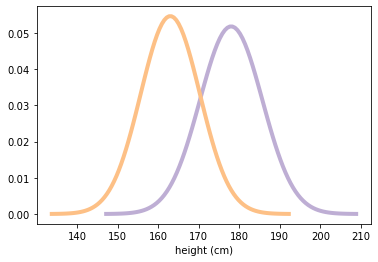

In [5]:
xs, ys = eval_pdf(male_height)
pyplot.plot(xs, ys, label='hombres', linewidth=4, color=COLOR2)

xs, ys = eval_pdf(female_height)
pyplot.plot(xs, ys, label='mujeres', linewidth=4, color=COLOR3)
pyplot.xlabel('height (cm)')
None

Supongamos por ahora que esas son las verdaderas distribuciones para la población.

Usaré `rvs` para generar muestras aleatorias de las distribuciones de población. Tenga en cuenta que estas son muestras totalmente aleatorias, totalmente representativas, ¡sin error de medición!

In [7]:
muestra_hombres = male_height.rvs(1000)

In [8]:
muestra_mujeres = female_height.rvs(1000)


Ambas muestras son matrices NumPy. Ahora podemos calcular estadísticas de muestra como la media y la desviación estándar.

In [9]:
mean1, std1 = muestra_hombres.mean(), muestra_hombres.std()
mean1, std1

(178.16511665818112, 7.84199617128995)

La media de la muestra está cerca de la media de la población, pero no es exacta, como se esperaba.

In [11]:
mean2, std2 =muestra_mujeres.mean(), muestra_mujeres.std()
mean2, std2

(163.48610226651135, 7.382384919896662)

Y los resultados son similares para la muestra femenina.

Ahora bien, hay muchas formas de describir la magnitud de la diferencia entre estas distribuciones. Uno obvio es la diferencia en los medios:

In [12]:
difference_in_means = muestra_hombres.mean() - muestra_mujeres.mean()
difference_in_means # in cm

14.679014391669767

En promedio, los hombres miden entre 14 y 15 centímetros más. Para algunas aplicaciones, esa sería una buena forma de describir la diferencia, pero hay algunos problemas:

* Sin saber más sobre las distribuciones (como las desviaciones estándar) es difícil interpretar si una diferencia como 15 cm es mucha o no.

* La magnitud de la diferencia depende de las unidades de medida, lo que dificulta la comparación entre diferentes estudios.

Hay varias formas de cuantificar la diferencia entre distribuciones. Una opción simple es expresar la diferencia como porcentaje de la media.

** Ejercicio 1 **: ¿cuál es la diferencia relativa de medias, expresada como porcentaje?

In [ ]:
#solucion

## Parte T2

Una forma alternativa de expresar la diferencia entre distribuciones es ver cuánto se superponen. Para definir la superposición, elegimos un umbral entre los dos medios. El umbral simple es el punto medio entre las medias:

In [15]:
simple_thresh = (mean1 + mean2) / 2
simple_thresh

170.82560946234622


Un umbral mejor, pero un poco más complicado, es el lugar donde se cruzan los PDF.

In [16]:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)
thresh

170.6040359174722

En este ejemplo, no hay mucha diferencia entre los dos umbrales.

Ahora podemos contar cuántos hombres están por debajo del umbral:

In [17]:
male_below_thresh = sum(muestra_hombres < thresh)
male_below_thresh

164

And how many women are above it:

In [18]:
female_above_thresh = sum(muestra_mujeres > thresh)
female_above_thresh

174

La "superposición" es el área debajo de las curvas que termina en el lado equivocado del umbral.

In [19]:
male_overlap = male_below_thresh / len(muestra_hombres)
female_overlap = female_above_thresh / len(muestra_mujeres)
male_overlap, female_overlap

(0.164, 0.174)

En términos prácticos, puede informar la fracción de personas que se clasificarían erróneamente si intentara usar la altura para adivinar el sexo, que es el promedio de las tasas de superposición de hombres y mujeres:

In [20]:
misclassification_rate = (male_overlap + female_overlap) / 2
misclassification_rate

0.16899999999999998

Otra forma de cuantificar la diferencia entre distribuciones es lo que se llama "probabilidad de superioridad", que es un término problemático, pero en este contexto es la probabilidad de que un hombre elegido al azar sea más alto que una mujer elegida al azar.

** Ejercicio 2 **: Supongamos que elijo un hombre y una mujer al azar. ¿Cuál es la probabilidad de que el hombre sea más alto?
